### Chat With Langraph

In [ ]:
!pip install langgraph langsmith

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [langgraph]/5 [langgraph]prebuilt]


In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [7]:
groq_api_key = os.getenv("GROQ_API_KEY")


In [9]:
langsmith = os.getenv("LANGCHAIN_API_KEY")

In [10]:
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"] = "True"
os.environ["LANGCHAIN_PROJECT"] =  "CourseLanggraph"

In [11]:
from langchain_groq import ChatGroq

In [12]:
llm = ChatGroq(groq_api_key=groq_api_key, model="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7f4fa25feba0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7f4fa2641010>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

### Start Building Chatbot Using LangGraph

In [13]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [14]:
class State(TypedDict):
    ## Messages have the type "list". The add_messages function
    ## In the annitation defines how this state key should be updated
    ## (In this casae, it appends messages to the list, rather than overwriting them)
    messages:Annotated[list, add_messages]
    
graph_builder = StateGraph(State)

In [15]:
graph_builder

In [17]:
def chatbot(state:State):
    return {"messages":llm.invoke(state['messages'])}

In [18]:
graph_builder.add_node("chatbot", chatbot)

In [19]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [20]:
graph = graph_builder.compile()

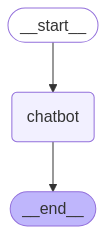

In [21]:
from IPython.display import Image, display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [22]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "q"]:
        print("Good Bye")
        break
    for event in graph.stream({'messages':('user', user_input)}):
        print(event.values())
        for value in event.values():
            print(value["messages"])
            print("Assistant:", value["messages"].content)

dict_values([{'messages': AIMessage(content='Hello! 👋  What can I do for you today?\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 11, 'total_tokens': 26, 'completion_time': 0.027272727, 'prompt_time': 0.001915445, 'queue_time': 0.247760005, 'total_time': 0.029188172}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-109c008c-9fd4-43b0-b5e3-0730f50e82d7-0', usage_metadata={'input_tokens': 11, 'output_tokens': 15, 'total_tokens': 26})}])
content='Hello! 👋  What can I do for you today?\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 11, 'total_tokens': 26, 'completion_time': 0.027272727, 'prompt_time': 0.001915445, 'queue_time': 0.247760005, 'total_time': 0.029188172}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-109c008c-9fd4-43b0-b5e3